# Step 1: Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Importing dataset

Dataset can be loaded from your local directory, or downloaded from the scikit learn database using "load_diabetes(*[, return_X_y, as_frame])"

In [2]:
data = pd.read_csv('diabetes_dataset.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Step 3: Data Preprocessing

In [3]:
# check for nan values
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

The dataset contains natural language data indicating yes or no, positive or negative, male or female. These need to be converted to categorical 1s and 0s.

Here is a function that does just that.

In [4]:
def convert(conv_data):
    '''converts Yes/No, Male/Female, etc. strings to 1s and 0s'''
    a = {'Yes': 1, 'No': 0}
    o = {'Positive': 1, 'Negative': 0}
    g = {'Male': 1, 'Female': 0}
    
    # state the columns that contains the target strings
    yes_no = ['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
    pos_neg = ['class']
    mal_fem = ['Gender']
    
    for x in conv_data.columns:
        if x in mal_fem:
            conv_data[x] = conv_data[x].map(g)
        elif x in yes_no:
            conv_data[x] = conv_data[x].map(a)
        elif x in pos_neg:
            conv_data[x] = conv_data[x].map(o)
        else:
            conv_data[x] = conv_data[x]
convert(data)
data.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [5]:
data.columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
               'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
               'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness',
               'alopecia', 'obesity', 'class']
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


C:\Users\Tomi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

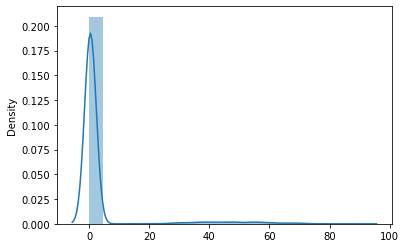

In [6]:
# check for outliers
sns.distplot(data, bins=20)
#sns.boxplot((data).any())

In [7]:
# TO-DO: 
# make correlation plots between age and diabetic positive people
# check median age of diabetic people


In [8]:
# assign X and y features
X = data.drop('class', axis = 1)
y = data['class']

In [9]:
# split X and y to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [10]:
# apply scaling due to the difference in the ages and the 1s and 0s 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 4: Machine Learning

This is a classification problem. Here I applied Decision Tree, Neural Network and Random Forest Classifier.

## Decision Tree Classifier

In [11]:
#import pydotplus
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtc = dtree.predict(X_test)
'''features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
data2 = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data2)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()'''

"features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',\n       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',\n       'Itching', 'Irritability', 'delayed healing', 'partial paresis',\n       'muscle stiffness', 'Alopecia', 'Obesity']\ndata2 = tree.export_graphviz(dtree, out_file=None, feature_names=features)\ngraph = pydotplus.graph_from_dot_data(data2)\ngraph.write_png('mydecisiontree.png')\nimg=pltimg.imread('mydecisiontree.png')\nimgplot = plt.imshow(img)\nplt.show()"

In [12]:
%%timeit -n 5
print('classsification report:', classification_report(y_test, pred_dtc))
print('confusion matrix:', confusion_matrix(y_test, pred_dtc))
dtc_mod = accuracy_score(y_test, pred_dtc)
print('Model Accuracy: ' + str(dtc_mod * 100) + '%')

classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.98      0.99      0.99       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  1 101]]
Model Accuracy: 98.25581395348837%
classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.98      0.99      0.99       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  1 101]]
Model Accuracy: 98.25581395348837%
classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1 

classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.98      0.99      0.99       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  1 101]]
Model Accuracy: 98.25581395348837%
classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.98      0.99      0.99       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  1 101]]
Model Accuracy: 98.25581395348837%
classsification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1 

## Neural Networks

In [13]:
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=2000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [14]:
%%timeit -n 5
print('classsification report:', classification_report(y_test, pred_mlpc))
print('confusion matrix:', confusion_matrix(y_test, pred_mlpc))
mlpc_mod = accuracy_score(y_test, pred_mlpc)
print('Model Accuracy: ' + str(mlpc_mod * 100) + '%')

classsification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.98      0.98      0.98       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  2 100]]
Model Accuracy: 97.67441860465115%
classsification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.98      0.98      0.98       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  2 100]]
Model Accuracy: 97.67441860465115%
classsification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1 

Model Accuracy: 97.67441860465115%
classsification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.98      0.98      0.98       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  2 100]]
Model Accuracy: 97.67441860465115%
classsification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.98      0.98      0.98       102

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172

confusion matrix: [[ 68   2]
 [  2 100]]
Model Accuracy: 97.67441860465115%
classsification report:               precision    recall  f1-score   support

           0       0.97      0.9

# Random Forest Classifier

In [15]:
%%timeit
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

588 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# NameError: name 'pred_rfc' is not defined
'''
print(pred_rfc)
print('classsification report:', classification_report(y_test, pred_rfc))
print('confusion matrix:', confusion_matrix(y_test, pred_rfc))
rfc_accuracy = accuracy_score(y_test, pred_rfc)
print('Model Accuracy: ' + str(rfc_accuracy) + '%')'''

"\nprint(pred_rfc)\nprint('classsification report:', classification_report(y_test, pred_rfc))\nprint('confusion matrix:', confusion_matrix(y_test, pred_rfc))\nrfc_accuracy = accuracy_score(y_test, pred_rfc)\nprint('Model Accuracy: ' + str(rfc_accuracy) + '%')"

# Step 5: Test the model with new data

In [17]:
data.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [18]:
# test new data (manually)
Xnew = [[50, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]]
ynew_mlpc = mlpc.predict(Xnew)
print('class:', ynew_mlpc)

class: [1]


In [19]:
# test existing data manually
Xnew2 = [[45, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]]
Xnew3 = [[70, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]]
Xnew4 = [[41, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]]
ynew_mlpc2 = mlpc.predict(Xnew2)
ynew_mlpc3 = mlpc.predict(Xnew3)
ynew_mlpc4 = mlpc.predict(Xnew4)
print('class:', ynew_mlpc2)
print('class:', ynew_mlpc3)
print('class:', ynew_mlpc4)

class: [1]
class: [1]
class: [1]


In [20]:
# pickling the model
import pickle
pickle_out = open("mlpc.pkl", "wb")
pickle.dump(mlpc, pickle_out)
pickle_out.close()

Prediction seems to be biased towards the age. The older the patient, the higher chance he's diagnosed positive

Update

- resolve issue with random forest NameError
- resolve issue with pydotplus